<a href="https://colab.research.google.com/github/Norwrongcl/ADA-Informes/blob/main/QuickSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Ordenamiento Secuencial

**Entrada**: Cadena de n números $[a_1,a_2,...,a_n]$

**Salida**: Secuencia ordenada de la entrada: $[a_1',a_2',...,a_n']$, tal que se cumple:  $a_1'\leq a_2' \leq... \leq a_n'$.

![quicksort animation](https://curriculum-content.s3.amazonaws.com/data-structures-and-algorithms/quicksort/quick_sort_partition_animation.gif)

Existen bastantes algoritmos de ordenamiento que han sido desarrollados a través del tiempo, tal vez, unos más eficientes que otros a pesar de su similaridad. El algoritmo expuesto en este informe es uno de los más eficiente, ya que aplica el paradigma de divide y vencerás (como merge sort), ya que el ordenamiento de arreglos más pequeños facilita el reordenamiento en el arreglo principal. Aunque *QuickSort* no necesita de auxiliares para ordenarse.

Este algoritmo fue desarrollado por **Tony Hoare** en el año 1959.



# 2. QuickSort

El siguiente código muestra una implementación del algoritmo **QuickSort**.

In [1]:
import random
import statistics
from termcolor import cprint
import matplotlib.pyplot as plt
import math
cont= 0


def mediana(x, y, z,verbose):                                                         # Función que busca la mediana entre tres números
  t= [x, y, z]
  if verbose == True: cprint(f"Elementos recibidos: {t}\n",'magenta',attrs=['bold'])

  med= statistics.median(t)                                                           # Calcula la mediana
  if verbose == True: cprint(f"Mediana de elementos recibidos: {med}\n",'green',attrs=['bold'])
  return med



# Partition con ultimo elemento como pivote

def lastpartition(l, c, f, verbose):
  global cont
  if verbose == True:
    cprint("Llamada a partition con pivote en el ultimo elemento\n",'red',attrs=['bold','underline'])
    cprint(f"\nArreglo a dividir: {l[c:f+1]}\n",'magenta',attrs=['bold'])
  
  pivot = l[f]                                                                        # Último elemento como pivote
  if verbose == True: cprint(f"Pivote: [{l[f]}]",'yellow')
  x= c                                                                                # El puntero de intercambio se inicializa como el incio de la lista
  
  for i in range(c, f):                                                               # El puntero j recorre todo el intervalo
    if l[i] <= pivot:                                                                 # Si l[j] es menor o igual al pivote se realiza el intercambio
      if verbose == True: cprint(f"Se intecambió {l[i]}, es menor al pivote {pivot}",'magenta',attrs=['bold'])
      l[i], l[x] = l[x], l[i]                                                         # Se intercambian las posiciones de l[j] y l[i] 
      x+= 1                                                                           # Se acota el intervalo
      if verbose == True: cprint(f"Arreglo actual: {l[c:f+1]}",'blue',attrs=['bold','underline'])
      cont+= 1
  l[x], l[f] = l[f], l[x]

  if verbose == True:
    cprint(f"Arreglo particionado: {l[c:f+1]}\n",'yellow',attrs=['bold','underline'])
  return x                                                                            # El nuevo pivote es la posición x de nuestro arreglo



# Partition con primer elemento como pivote

def firstpartition(l, c, f, verbose):
  global cont
  if verbose == True:
    cprint("Llamada a partition con pivote en el primer elemento\n",'red',attrs=['bold','underline'])
    cprint(f"\nArreglo a dividir: {l[c:f+1]}\n",'magenta',attrs=['bold'])

  pivot = l[c]                                                                        # Primer elemento como pivote
  if verbose == True: print(f"Pivote: [{l[c]}]")
  x= c+1                                                                              # El índice que define left es el siguiente a c

  for i in range(c+1,f+1):                                                            # El índice i recorre desde la posición x hasta el último elemento
    if l[i] <= pivot:                                                                 # Si l[j] es menor o igual al pivote se realiza el intercambio
      if verbose == True: cprint(f"Se intecambió {l[i]}, es menor al pivote {pivot}",'yellow')
      cont+= 1
      l[x], l[i] = l[i], l[x]                                                         # Intercambio de las posiciones de l[i] con l[x]
      x+= 1                                                                           # El índice izquierdo avanza una posición
      if verbose == True: cprint(f"Arreglo actual: {l[c:f+1]}",'cyan')
  l[c], l[x-1] = l[x-1], l[c]                                                      

  if verbose == True: cprint(f"Arreglo particionado: {l[c:f+1]}",'yellow')
  return x-1                                                                          # Retornamos como pivote x-1



# Mediana al azar de 3 numeros como pivote

def randpartition(l, c, f, verbose):
  global cont
  if verbose == True:
    cprint("Llamada a partition con pivote al azar\n",'red',attrs=['bold','underline'])
    cprint(f"\nArreglo a dividir: {l[c:f+1]}\n",'magenta',attrs=['bold'])

  x= random.choice(l[c:f])
  y= random.choice(l[c:f])
  z= random.choice(l[c:f])

  pivot= mediana(x,y,z,verbose)                                                       # Pivote es la mediana entre tres elementos aleatorios
  indexpivot= l.index(pivot)                                                          # Se busca el índice del pivote
  if verbose == True: cprint(f"La mediana y pivote es: [{pivot}]",'cyan')

  l[indexpivot], l[c]= l[c], pivot                                                    # Se traslada el pivote al incio de la lista

  x= c+1
  for i in range(c+1,f+1):
    if l[i] <= pivot:
      if verbose == True: cprint(f"Se intecambió {l[i]}, es menor al pivote {pivot}",'yellow')
      cont+= 1
      l[i], l[x] = l[x], l[i]
      x+= 1
      if verbose == True: cprint(f"Arreglo actual: {l[c:f+1]}",'cyan')
  l[c], l[x-1] = l[x-1], l[c]

  if verbose == True: cprint(f"Arreglo particionado: {l[c:f+1]}",'yellow')
  return x-1



# QUICKSORT

def quicksort(l, start, end, pivote, verbose):
  if (start == end):                                                                  # Si el arreglo es de solo un elemento, se retorna este elemento
    if verbose == True: cprint(f"Arreglo de solo un elemento [{l[start]}]\n",'magenta',attrs=['bold'])
    return l

  if (start < end):                                                                   # Hacemos quicksort solo si el arreglo no tiene UN elemento                                                                                
    if (pivote == 1): pivot = lastpartition(l, start, end, verbose)
    elif (pivote == 2): pivot= firstpartition(l, start, end, verbose)
    else:  pivot= randpartition(l, start, end, verbose)
                                                                                      # Luego de dividir y ordenar el arreglo, se llama recursivamente                                                                                      
    if verbose == True:                                                               # La función para ordenar la primera y segunda mitad del arreglo
      if (len(l[start:pivot-1]) > 0):
        cprint(f"Llamada recursiva con arreglo izquierdo: {l[start:pivot]}",'red')
        quicksort(l, start, pivot-1, pivote, verbose)
    else: quicksort(l, start, pivot-1, pivote, verbose)
    if verbose == True and (len(l[start:pivot-1]) > 0):
        cprint(f"Llamada recursiva con arreglo derecho: {l[pivot+1:end+1]}",'blue')
        quicksort(l, pivot+1, end, pivote, verbose)
    else: quicksort(l, pivot+1, end, pivote, verbose)
  
  if verbose == True and len(l[start:end+1])> 0: cprint(f"Subarreglo ordenado: {l[start:end+1]}",'green')
  return l



# MAIN #


def main(verbose=True):
  global cont
  pivote= random.randint(1,3)                                                         # Define implementación de partition a utilizar
  n= random.randint(2,8)                                                              # Genera largo de la lista
  list= random.sample(range(1,100),n)                                                 # Lista de largo n aleaotoria
  cprint(f"Entrada: {list}\n",'green',attrs=['bold','underline'])

  list= quicksort(list, 0, len(list)-1, pivote, verbose)

  cprint(f"\nSalida: {list}",'magenta',attrs=['bold','underline'])
  cprint(f"Comparaciones: {cont}\n",'cyan',attrs=['bold'])

  if pivote == 1: cprint("Partition con ultimo elemento como pivote!!!",'red',attrs=['bold'])
  if pivote == 2: cprint("Partition con primer elemento como pivote!!!",'red',attrs=['bold'])
  if pivote == 3: cprint("Mediana de 3 numeros azar  como pivote!!!",'red',attrs=['bold'])

main(verbose=False)


Entrada: [7, 25, 17, 1, 72]


Salida: [1, 7, 17, 25, 72]
Comparaciones: 4

Mediana de 3 numeros azar  como pivote!!!


## 2.2. Descripción del algoritmo

*Quick Sort* utiliza el paradigma de divide y venceras dividiendo la lista en partes cada vez más pequeñas o en subproblemas más pequeños.

El algoritmo recibe como entrada una lista (o arreglo) $L$ con la secuencia de $n$ elementos que queremos ordenar. Luego, los elementos son ordenados dentro de la misma lista.

1. Se llama a la función partition, la cual selecciona un pivote con el cual dividiremos el algoritmo.

2. Ya con nuestro pivote, la función se llama recursivamente en dos ocasiones: para ordenar el **subarreglo izquierdo al pivote** y aquel **subarreglo derecho al pivote**.

3. Finalmente, **quicksort** nos retorna el arreglo original ya ordenado. Cabe resaltar que si éste es de solo un elemento, se retorna inmediatamente sin hacer lo anterior.


![image](https://i.imgur.com/Es9Tue5.png)

### Además de la función **Quicksort**, el algoritmo llama a la función **Partition**, la cual reordena el arreglo original, dividiendo a éste en dos con respecto a un pivote y dando como resultado un subarreglo menor a la izquierda y un subarreglo mayor a la derecha. En en el codigo la función **Partition** fue implementada de tres maneras:
---
* Último elemento como pivote:

 Seleccionamos como pivote al último elemento de un arreglo ($l[f]$).

 Con ayuda de dos índices $x$ e $i$ recorremos el arreglo hasta $f-1$.

 En cada iteración, se verificas si $l[i]$ es menor o igual al pivote. Si es verdadero, intercambiamos $l[i]$ con $l[x]$, y avanzamos con $x$.

 Al terminar el bucle, intercambiamos $l[f]$ con $l[x]$, y retornamos $x$.

* Primer elemento como pivote:

 En este caso, el pivote será el primer elemento del arreglo ($l[c]$)

 Con ayuda de dos índices $x$ e $i$ recorremos el arreglo desde $c+1$ hasta $f$.

 En cada iteración, se verifica si $l[i]$ es menor o igual al pivote. Si es así, intercambiamos $l[i]$ con $l[x]$, y avanzamos con $i$.

 Al terminar el bucle, intercambiamos $l[c]$ con $l[x-1]$, y retornamos $x-1$.

* La mediana de tres elementos al azar del arreglo como pivote:

 El pivote será la mediana de tres elementos, los cuales son escogidos de forma aleatoria.

 Con ayuda de otra función, calculamos cuál es la mediana de estos elementos. 
 
 Al obtener este, buscamos su índice en el arreglo $l$.

 Luego intercambiamos este número con el primer elemento del arreglo ($l[c]$), después realizamos el mismo proceso como si se tratara del primer elemento como pivote.

---
Cuando la variable `verbose` == `True` se muestra información para ver lo que pasa paso a paso dentro de la función.

## 2.3. Ejemplo

Consideremos, por ejemplo, el arreglo:

$l = [7,30,6,69]$

Utilizaremos el primer elemento como pivote, por lo que: $l[0]=pivote$. Nuestro índice $x$ comenzará en $l[1]$, y con $i$ recorremos hasta $l[3]$.

$l = [7,30,6,69]$, donde `x=>7` e `i=>30`

Como $7$ es meno a $30$, no pasa nada, por lo que avanzamos con $i$.

$l = [7,30,6,69]$, donde `x=>7` e `i=>6`

En este caso, como $7$ es mayor a $6$, intercambiamos $l[x]$ con $l[i]$, y avanzamos tanto con $x$ como con $i$.

$l = [7,6,30,69]$, donde `x=>7` e `i=>69`

Siguiente número. $69$ es mayor a $7$, así que queda igual.

Al terminar la función **partition** en esta pasada, intercambiamos $l[0]$ con $l[x-1]$.

$l = [6,7,30,69]$

Ya se ha ordenado el arreglo

## 2.4. Ejecución del algoritmo paso a paso (`verbose=True`)

Usando la opción `verbose=True`, podemos ver lo que ocurre en cada iteración del algoritmo.

In [ ]:
main(verbose=True)

Entrada: [41, 90, 63]

Llamada a partition con pivote en el primer elemento


Arreglo a dividir: [41, 90, 63]

Pivote: [41]
Arreglo particionado: [41, 90, 63]
Llamada recursiva con arreglo izquierdo: []
Llamada recursiva con arreglo derecho: [90, 63]
Llamada a partition con pivote en el primer elemento


Arreglo a dividir: [90, 63]

Pivote: [90]
Se intecambió 63, es menor al pivote 90
Arreglo actual: [90, 63]
Arreglo particionado: [63, 90]
Subarreglo ordenado: [63, 90]
Subarreglo ordenado: [41, 63, 90]

Salida: [41, 63, 90]
Comparaciones: 10

Partition con primer elemento como pivote!!!


# 3. Correctitud

### **Teorema (Correctitud) de $f$(Partition) .**

El algoritmo **Partition** recibe un arreglo $l[c,...,f]$, lo ordena y retorna un índice $x$ tal que los elementos del arreglo $l[c,...,x-1]$ son menor o igual a $l[x]$ y los elementos del arreglo $A[x+1,...,f]$ son mayores a $l[x]$


## Prueba del Teorema
**Prueba invariante de bucle:**

> Al comienzo de cada iteración, se cumple que: 
  Para cualquier índice $z$ del arreglo:

* Si $c \leq z \leq i$, entonces $l[z] \leq x$
* Si $x < z < j$, entonces $l[z] > x$

  Donde $c$ es el primer elemento de $l$ y $x$ un pivote. 

> **Inicialización**

Antes de comenzar $i= c$ y $j= c$. Porque no hay valores entre $c$ e $i$, como no están en la misma posición, se asume que el índice $z$ no existe, dejando al conjuntos $l[z]$ sin elementos. Así decimos que la propiedad se cumple.

> **Mantención**

Esto cambia en la i-ésima iteración. Ya que tras comparar si $l[z]$ es menor o mayor a nuestro pivote $x$. Si $l[j] > x$, $j$ incrementa y ningún elemento se mueve de su posición en el subarreglo $l[i+1,...,j-1]$, como no ocurre ningún cambio la condición se cumple. Mientras que, si $l[j] \leq x$, i Si incrementa, y se intercambian  l[i] con l[j], y luego incrementa en j una unidad. Con este cambio, se obtiene que  $l[i] \leq x$, manteniendo la condición.

> **Correctitud**

Como se cumple tanto al inicio como durante la ejecución del bucle la propiedad descrita, podemos concluir decir que la función **Partition** es correcta, formando un arreglo de  n  elementos el cual estará dividido respecto al pivote l[x], donde $l[0,...,x−1]$ serán menores a `x`, mientras que $l[x+1,...,n]$ tendrá elementos mayores.

# 3.1 Correctitud

### **Teorema (Correctitud) de $f$(QuickSort) .**

El algoritmo **Quick Sort** genera un arreglo: $[a_1,a_2,a_3,...,a_n]$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor;  $a_1 \leq a_2 \leq a_3 \leq ... \leq a_n$.

## Prueba del Teorema

Como es una función recursiva y por lo tanto la podemos analizar usando **inducción matemática**.

>**Caso inicial:**

Con $n=1$
Como el arreglo es de solo un elemento, este ya se encuentra ordenado, por lo que se retorna este, cumpliéndo así $P(1)$.



>**Inducción:**

Para $n=1$ --> $P(1)$

Entonces Para $n>1$ :

Con **Quick Sort** un arreglo de $n$ elementos éste se divide en dos subarreglos $[0,...,x-1]$ y $[x+1,...,n]$, con $x$ siendo el pivote elegido por la función **Partition**.

Como el tamaño de los subarreglos serán **siempre menores a $n$**, gracias a la inducción asumimos que éstos van a estar ordenados correctamente siempre al llegar a n==1.

Como todo esto ocurre dentro de un mismo arreglo sin ayuda de otra función auxiliar, podemos concluir que el arreglo estará **Ordenado de Menor a Mayor**.Por lo que **Quick Sort** es correcto.



# 4. Tiempo de ejecución

### **Teorema (Tiempo de ejecución).**

El algoritmo **Quick Sort** tiene un tiempo de ejecución de $O(n*log(n))$ en el caso promedio y mejor caso, mientras que en el peor caso tiene un tiempo de ejecución de $O(n^2)$.

## Prueba del teorema

Considerando que *Partition* recibe el último elemento del arreglo como pivote, el peor caso se lleva a cabo cuando el arreglo de entrada ya viene ordenado de menor a mayor.

Para nuestra ecuación de recurrencia, consideramos que se va a dividir el arreglo en $(n-1)$ elementos, mientras que la función Partition, como siempre recorrerá $(n-1)$ elementos, es decir una complejidad $O(n)$.

**Ecuación Recurrente:**

$T(n)= T (n-1) + O(n)$
          

######Descripción:

El tamaño del problema es un arreglo de $n$ elementos, el cual asumiremos, es una potencia de 2. Nuestro algoritmo divide cada problema en 2 "subproblemas", siendo cada uno la mitad anterior.

Por otro lado, la complejidad de la función **maxmid** es $O(n)$, debido a que se debe recorrer todo el arreglo en busca del máximo en el medio.

Así, gracias al desarrollo matemático de la expresión se puede concluir que el tiempo de ejecución para el peor caso es efectivamente **O(n2)**.

![image](https://i.imgur.com/dT6MifF.jpg)

### Mejor caso y/o caso promedio $O(n*logn)$

El mejor caso, es igual al promedio y ocurre cuando cada partición generada por la función partition son ambas del mismo tamaño o se acercan por una unidad.

**Ecuación Recurrente:**

$T(n)= 2T(n/2) + O(n)$

Aplicando el **teorema maestro**. En este caso, tenemos que `a= 2`, `b= 2` y `d= 1`, tal que $b^d= a = 2^1 = 2$. Así, concluimos en que el tiempo de ejecución en estos casos es de $O(n*logn)$.

# 5. Experimentos

## 5.1. Número de comparaciones

A continuación se muestra gráficamente:

* Comparación del número de comparaciones    realizadas experimentalmente con el mejor y peor caso teóricos.

* Comparación del algoritmo QuickSort, con MergeSort.

* Comparación el rendimiento del algoritmo al modificar la selección del pivote (punto 1).

Los arreglos de entrada son generados aleatoriamente haciendo un sampling de un conjunto de números entre -100 y 300.

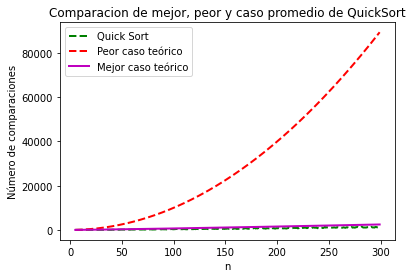

In [11]:
x= [n for n in range(5,300)]
y1= [n**2 for n in range(5,300)] # Peor caso
y2= [n*math.log2(n) for n in range(5,300)] # Mejor caso
y= []

for n in range(5,300):
  cont= 0
  l= random.sample(range(-100, 300), n)
  l= quicksort(l, 0, len(l)-1, 1, verbose=False)
  y.append(cont)

plt.plot(x,y,'g--',lw=2)
plt.plot(x,y1,'r--',lw=2)
plt.plot(x,y2,'m-',lw=2)
plt.legend(["Quick Sort", "Peor caso teórico", "Mejor caso teórico"])
plt.title("Comparacion de mejor, peor y caso promedio de QuickSort")
plt.xlabel('n')
plt.ylabel("Número de comparaciones")

plt.show()

### Análisis de resultados

Se puede notar en el gráfico que por raro que parezca el caso promedio se encuentra por debajo del **Mejor caso teórico** . Una posible causa que explique este comportamiento podría ser la aleatoriedad de la elección del pivote escogido el cual puede ser el más conveniente justo en ese caso.


In [14]:
### IPORTANDO MERGE SORT ###

def merge(sl, sr, verbose):
  global cont
  templist=[]
  while len(sl)>0 and len(sr)>0:

    if sl[0]<sr[0]:
      templist.append(sl[0])
      cont+=1
      if verbose==True:
        cprint(f"Lista ordenandose: {templist}\n",'green',attrs=['bold','underline','dark'])
      sl=sl[1:]


    else:
      templist.append(sr[0])
      cont+=1
      if verbose==True:
        cprint(f"Lista ordenandose: {templist}\n",'green',attrs=['bold','underline','dark'])
      sr=sr[1:]

  
  if len(sl)>0:
    templist+=sl

  if len(sr)>0:
    templist+=sr

  if verbose==True:
        cprint(f"Lista ordenanda: {templist}\n",'cyan',attrs=['bold'])

  return templist

def merge_sort(List, verbose):
  global recur
  if len(List)== 1:
    return List
  middledledledle= len(List)// 2
  l= List[:middledledledle]
  r= List[middledledledle:]
  if verbose==True:
      cprint(f"Parte izquierda: {l}",'blue')
      cprint(f"Parte derecha: {r}\n",'magenta')
  recur+=1
  sl= merge_sort(l, verbose)
  recur+=1
  sr= merge_sort(r, verbose)
  
  return merge(sl, sr, verbose)

cont=0
recur=0    
List= [4,7,2,3,5,6]
cprint(f"Entrada: {List}\n",'yellow',attrs=['bold','dark'])
cprint(f"Salida: {merge_sort(List, verbose=False)}",'green',attrs=['bold','blink','dark'])
cprint(f"Llamadas recursivas: {recur}",'green',attrs=['bold','blink','dark'])
cprint(f"Comparaciones: {cont}",'green',attrs=['bold','blink','dark'])


def test(List,verbose=False):
  global cont
  a=List
  merge_sort(a,verbose=False)
  return cont

Entrada: [4, 7, 2, 3, 5, 6]

Salida: [2, 3, 4, 5, 6, 7]
Llamadas recursivas: 10
Comparaciones: 10


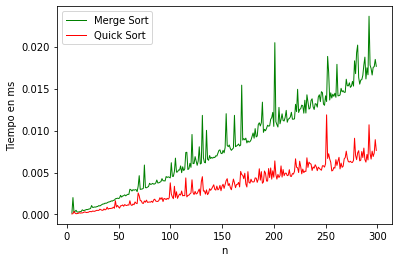

In [20]:
import datetime
from timeit import repeat

x1= []; y1= []; x2= []; y2= []
verbose = False
for n in range(5,300):
  l= random.sample(range(-100,300), n)

  r= repeat(setup="from __main__ import test", stmt = f"test({l})", repeat = 1, number = 10)
  t= repeat(setup="from __main__ import quicksort", stmt = f"quicksort({l}, {0}, {len(l)-1}, {1}, {verbose})", repeat = 1, number = 10)

  x1.append(n)
  x2.append(n)
  y1.append(r)
  y2.append(t)

plt.plot(x1,y1,'g',lw=1)
plt.plot(x2,y2,'r',lw=1)
plt.legend(["Merge Sort","Quick Sort"])

plt.xlabel("n")
plt.ylabel("Tiempo en ms")

plt.show()

### Análisis de resultados

Luego de la ejecución de ambos algoritmos ordenando el mismo arreglo, se puede evidenciar que, claramente el algoritmo de merge sort es más rápido que quicksort al elegir como pivote al último elemento del arreglo, además de que, se puede apreciar que existen ciertos peaks que afectan en el mismo punto a ambos algoritmos, esto podría deberse al hardware que está ejecutando el código O a la forma en la que se comporta el algoritmo con ciertos arreglos, es decir, su orden. 

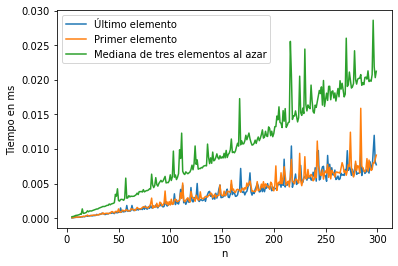

In [24]:
x1 = []; y1 = []; y2 = []; y3 = []
verbose = False

for n in range(5,300):
  l = random.sample(range(-100,300),n)

  r = repeat(setup="from __main__ import quicksort", stmt = f"quicksort({l}, {0}, {len(l)-1}, {1}, {verbose})", repeat = 1, number = 10)
  y1.append(r)
  t = repeat(setup="from __main__ import quicksort", stmt = f"quicksort({l}, {0}, {len(l)-1}, {2}, {verbose})", repeat = 1, number = 10)
  y2.append(t)
  q = repeat(setup="from __main__ import quicksort", stmt = f"quicksort({l}, {0}, {len(l)-1}, {3}, {verbose})", repeat = 1, number = 10)
  y3.append(q)

  x1.append(n)

plt.plot(x1,y1)
plt.plot(x1,y2)
plt.plot(x1,y3)
plt.legend(["Último elemento","Primer elemento","Mediana de tres elementos al azar"])

plt.xlabel("n")
plt.ylabel("Tiempo en ms")
plt.show()

### Análisis de resultados

Al parecer, cuando el arreglo está desordenado no existe mayor diferencia entre elegir el primer o el último elemento como pivote, pues, si comparamos a ambos con respecto a elegir como pivote la mediana de tres elementos al azar pertenecientes al arreglo original tarda bastante más, esto puede deberse a que principalmente elegir y calcular estos valores es donde más tarda la ejecución.